In [3]:
%load_ext autoreload
%autoreload 2

from astropy.visualization import quantity_support
import matplotlib
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)
from astroduet import config
from astropy import units as u
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


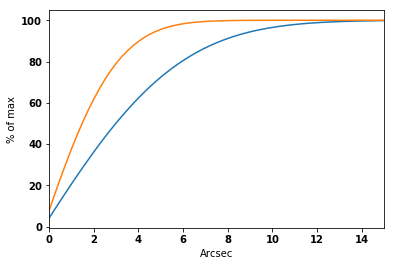

In [15]:
duet = config.Telescope()
pix_size, rad_pro = duet.calc_radial_profile(pix_size=0.25*u.arcsec)
rind = np.arange(len(rad_pro))*pix_size

eef = rad_pro.cumsum()
plt.plot(rind, 100*eef / eef.max())

duet.psf_params['sig'] = [1*u.arcsec]
pix_size, rad_pro = duet.calc_radial_profile(pix_size=0.25*u.arcsec)
rind = np.arange(len(rad_pro))*pix_size

eef2 = rad_pro.cumsum()

plt.plot(rind, 100*eef2 / eef2.max())

plt.xlim([0, 15])
plt.xlabel('Arcsec')
plt.ylabel('% of max')
plt.show()

f = open('eef_test.txt', 'w')

for ri, e1, e2 in zip(rind.value, eef, eef2):
    f.write('{} {} {}\n'.format(ri, e1 / eef.max(), e2 / eef2.max()))
f.close()
